# 4.19.x Final Assignment

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set(rc={'figure.figsize':(10, 5)})
sns.set(font_scale=1.5) 

### Part 1

The `food_consumption.csv` dataset from the `food` folder contains data on the several countries' food consumption per food category and their respective CO2 emissions. Load it to a DataFrame named `food` and check its contents.

In [2]:
food = pd.read_excel("data/food_consumption.xlsx")
print("shape:", food.shape)
food.head()

shape: (1430, 4)


,country,food_category,consumption,co2_emission
0,Argentina,pork,10.51,37.20
1,Argentina,poultry,38.66,41.53
2,Argentina,beef,55.48,1712.00
3,Argentina,lamb_goat,1.56,54.63
4,Argentina,fish,4.36,6.96


1. Use the `.describe()` method on the `food` DataFrame to produce descriptive statistics about the `consumption` metric for each class in the `food_category` variable. **Which `food_category` has the highest median value of `food_consumption`?** 

In [3]:
food.groupby("food_category")["consumption"].describe().sort_values("50%",ascending=False).head()

,count,mean,std,min,25%,50%,75%,max
food_category,,,,,,,,
dairy,130.0,125.774692,93.327721,3.04,45.7925,110.975,192.7150,430.76
wheat,130.0,71.549538,44.191318,2.74,37.0450,69.420,103.3725,197.50
poultry,130.0,21.219231,14.571980,0.47,10.9100,19.855,29.7475,62.50
fish,130.0,17.287077,19.013508,0.24,6.0250,13.950,21.8525,179.71
rice,130.0,29.375154,37.324471,0.95,4.7200,11.875,43.4425,171.73


In [4]:
median_by_food_consumption = food.groupby('food_category')['consumption'].median()
median_by_food_consumption.sort_values(ascending=False)

food_category
dairy        110.975
wheat         69.420
poultry       19.855
fish          13.950
rice          11.875
pork          10.355
eggs           8.420
beef           8.285
nuts           3.495
lamb_goat      1.325
soybeans       0.075
Name: consumption, dtype: float64

In [5]:
food.groupby("food_category")["consumption"].describe().sort_values("50%",ascending=False).head(1)

,count,mean,std,min,25%,50%,75%,max
food_category,,,,,,,,
dairy,130.0,125.774692,93.327721,3.04,45.7925,110.975,192.715,430.76


<AxesSubplot:xlabel='consumption', ylabel='food_category'>

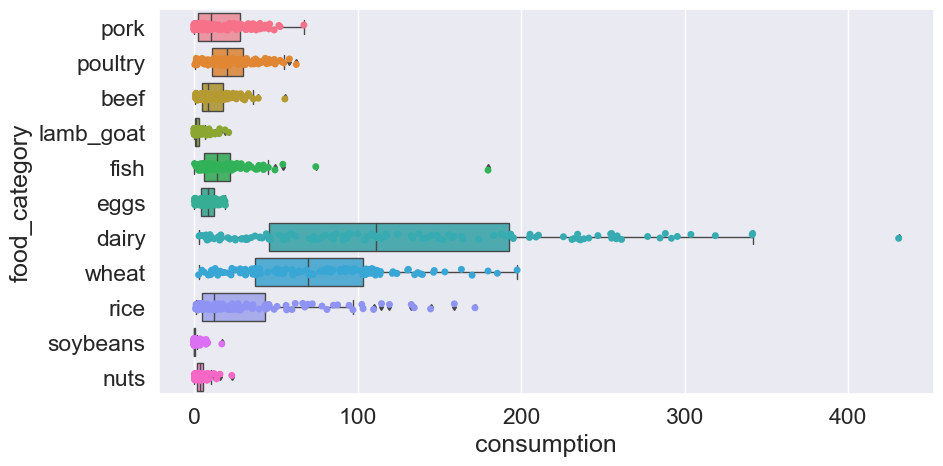

In [6]:
sns.stripplot(x = 'consumption', y = 'food_category', data = food, hue='food_category', legend=False)
sns.boxplot(x = 'consumption', y = 'food_category', data = food, fliersize=3, linewidth=1)

In [7]:
# the food with the highest median value of food consumption is 'Dairy' products.

2. In a single chart, plot one boxplot for each `food_category` (11 in total) using the variable `co2_emission` as the metric. **By looking at the chart, which `food_category` has the highest interquartile range (IQR)?**

<AxesSubplot:xlabel='co2_emission', ylabel='food_category'>

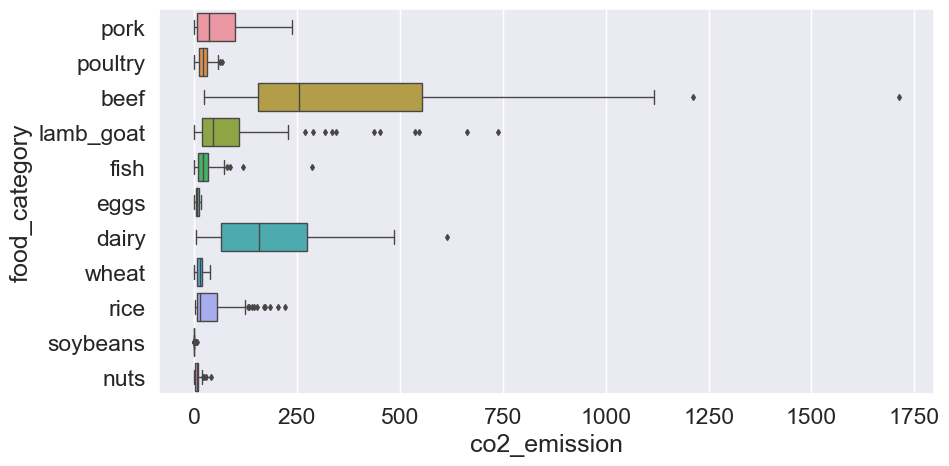

In [8]:
sns.boxplot(x = 'co2_emission', y = 'food_category', data = food,  fliersize=3, linewidth=1)

In [9]:
# The food with the highest interquartile range (IQR) is 'BEEF' , because the beef box plot has a greater length than the others.

3. Looking at the chart from the previous question, which is the `food_category` with the highest median `co2_emission` value? 

In [10]:
food.groupby('food_category')['co2_emission'].describe().sort_values("50%",ascending=False).head()

,count,mean,std,min,25%,50%,75%,max
food_category,,,,,,,,
beef,130.0,374.102000,297.906710,24.07,154.2150,255.655,553.5925,1712.00
dairy,130.0,179.153846,132.935669,4.33,65.2275,158.075,274.5000,613.57
lamb_goat,130.0,91.056769,128.356996,0.00,19.6100,46.405,108.6475,739.62
pork,130.0,57.070077,55.632396,0.00,7.3950,36.650,99.9150,237.54
fish,130.0,27.601692,30.358481,0.38,9.6225,22.270,34.8925,286.94


In [11]:
median_by_food_co2_emission = food.groupby('food_category')['co2_emission'].median()
median_by_food_co2_emission.sort_values(ascending=False)

food_category
beef         255.655
dairy        158.075
lamb_goat     46.405
pork          36.650
fish          22.270
poultry       21.325
rice          15.200
wheat         13.240
eggs           7.735
nuts           6.185
soybeans       0.035
Name: co2_emission, dtype: float64

In [12]:
# 'BEEF' is the food_category with the highest median co2_emission value

4. Consider the `consumption` of "poultry" and "fish" across all available `countries`; looking at the table from question 1, the average of poultry consumption (21.22) seems to be higher than that of fish consumption (17.29), but is this difference statistically significant? Create a permutation test in order to assess the null hypothesis that there is no difference between the two means. **Do you accept or reject the null hypothesis?** Explain why. 

In [13]:
food.groupby('food_category')['consumption'].describe()

,count,mean,std,min,25%,50%,75%,max
food_category,,,,,,,,
beef,130.0,12.123385,9.654140,0.78,4.9975,8.285,17.9400,55.48
dairy,130.0,125.774692,93.327721,3.04,45.7925,110.975,192.7150,430.76
eggs,130.0,8.163769,5.032582,0.16,3.9450,8.420,12.3125,19.15
fish,130.0,17.287077,19.013508,0.24,6.0250,13.950,21.8525,179.71
lamb_goat,130.0,2.600154,3.665252,0.00,0.5600,1.325,3.1025,21.12
nuts,130.0,4.137231,3.372817,0.18,1.8050,3.495,5.6100,23.03
pork,130.0,16.123692,15.717646,0.00,2.0900,10.355,28.2275,67.11
poultry,130.0,21.219231,14.571980,0.47,10.9100,19.855,29.7475,62.50
rice,130.0,29.375154,37.324471,0.95,4.7200,11.875,43.4425,171.73


In [14]:
treatment = food[food.food_category=='poultry']['consumption'].tolist()
control = food[food.food_category=='fish']['consumption'].tolist()

In [15]:
food[food['food_category'].isin(['poultry','consumption'])].groupby(['food_category'], as_index=False).agg({'consumption': ['count', 'sum', np.mean]}).sort_index(ascending=False)

food_category consumption                   
                      count     sum       mean
0       poultry         130  2758.5  21.219231

In [16]:
mu_treatment = np.mean(treatment)
mu_control  = np.mean(control)

In [17]:
mu_diff = mu_treatment - mu_control # sottraggo la media del primo trattamento meno la media del controllo
print('Observed of the difference:', round(mu_diff, 4))

Observed of the difference: 3.9322


In [18]:
df = pd.DataFrame({'group': ['treatment' if el <= len(treatment) else 'control' for el in range(1,(len(treatment)*2)+1)], 
                   'responses': treatment + control})

In [19]:
df.sample(5)

,group,responses
28,treatment,18.61
249,control,11.69
192,control,15.23
201,control,3.98
178,control,12.78


In [20]:
df.groupby(['group'], as_index=False).agg({'responses': ['count', 'sum', np.mean]})

group responses                    
                 count      sum       mean
0    control       130  2247.32  17.287077
1  treatment       130  2758.50  21.219231

In [21]:
n = 20000
np.random.seed(1)
mu_diff_samples = []
for i in range(n): 
    # estrarre un sottocampione del 50% dei dati senza sostituzione
    df_sample1 = df.sample(frac=0.5, replace=False)
    # usa set() per ottenere gli indici delle righe che non sono state estratte da df nel passaggio precedente
    ix2 = set(df.index) - set(df_sample1.index)
    # creare dataframe con un altro 50% di dati
    df_sample2 = df.iloc[list(ix2)]
    # calcolare la differenza nella media di ciascun campione
    mu_diff_temp = np.mean(df_sample1['responses']) - np.mean(df_sample2['responses'])
    # aggiungi la differenza media campionata all'elenco mu_diff_samples
    mu_diff_samples.append(mu_diff_temp)

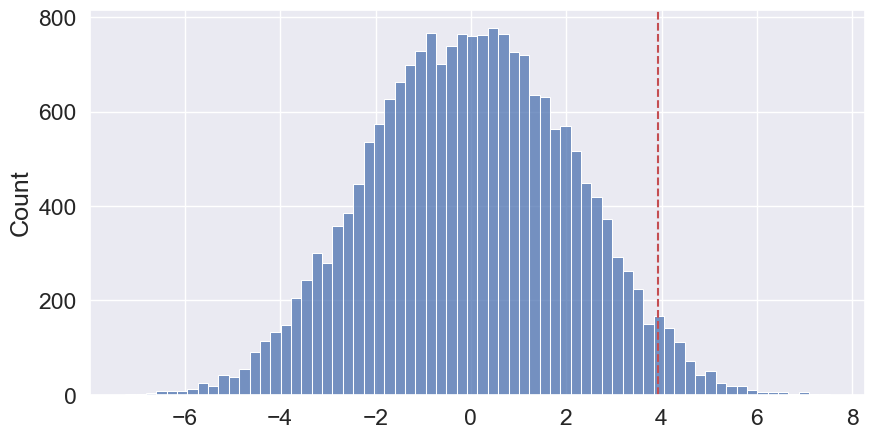

mu_diff: 3.93


In [22]:
sns.histplot(mu_diff_samples)
plt.axvline(mu_diff, 0, 1, color= 'r' , linestyle ='--')
plt.show()
print('mu_diff:' , round(mu_diff,2))

In [23]:
print('Values more extreme than observed:', sum([el >= mu_diff for el in mu_diff_samples]))
p_value = sum([el > mu_diff for el in mu_diff_samples])/n    # la somma del valore osservato fratto n
print('p-value:', p_value)

Values more extreme than observed: 604
p-value: 0.0302


In [24]:
alpha = 0.1  # alpha al 10%

if p_value <= alpha: # se il p-value è inferiore ad alpha (10%), allora il test è statisticamente significativo
    print('H0 rejected: the observed result is statistically significant | p-value <= alpha')
else: 
    print('H0 accepted | the observed result is not statistically significant | p-value > alpha')

H0 rejected: the observed result is statistically significant | p-value <= alpha


In [25]:
'''This means that, given an alpha significance level of 3%, then a p-value low relative to the observed value
   we can safely reject the null hypothesis and conclude that,
   there is no significant difference between the two averages.
'''

'This means that, given an alpha significance level of 3%, then a p-value low relative to the observed value\n   we can safely reject the null hypothesis and conclude that,\n   there is no significant difference between the two averages.\n'

In [26]:
# faccio una z-test per vedere se i risultati combaciano
from statsmodels.stats.weightstats import ztest as ztest 
ab_ztest = ztest(x1=df[df.group=='treatment']['responses'], 
                 x2=df[df.group=='control']['responses'], 
                 alternative='larger')
ab_ztest

(1.8715467274542925, 0.03063466972609316)

In [27]:
print('p-value:', ab_ztest[1])

p-value: 0.03063466972609316


### Part 2

The `world_happiness.csv` dataset from the `data` folder contains a series of variables that can be used as a proxy to a country's evaluation of its own goodness of life. The `happiness_score` metric tries to summarise how "happy" each country is. Load and save the dataset to a DataFrame object named `happy`. As always, familiarise yourself with its contents. 

In [28]:
happy = pd.read_excel("data/world_happiness.xlsx")
print("shape:", happy.shape)
happy.head()

shape: (143, 8)


,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
0,Finland,2.0,5.0,4.0,47.0,42400,81.8,155
1,Denmark,4.0,6.0,3.0,22.0,48300,81.0,154
2,Norway,3.0,3.0,8.0,11.0,66300,82.6,153
3,Iceland,1.0,7.0,45.0,3.0,47900,83.0,152
4,Netherlands,15.0,19.0,12.0,7.0,50500,81.8,151


In [29]:
happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          143 non-null    object 
 1   social_support   142 non-null    float64
 2   freedom          142 non-null    float64
 3   corruption       135 non-null    float64
 4   generosity       142 non-null    float64
 5   gdp_per_cap      143 non-null    int64  
 6   life_exp         143 non-null    float64
 7   happiness_score  143 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 9.1+ KB


5. Using a histogram, plot the distribution of the `happiness_score` variable, **which distribution does it resemble?** *(in the answer sheet write the [name of the distribution](https://miro.medium.com/max/962/1*DmPUIjvecL7KllOamoFSDw.png) that best fits the data)* 

<AxesSubplot:xlabel='happiness_score', ylabel='Probability'>

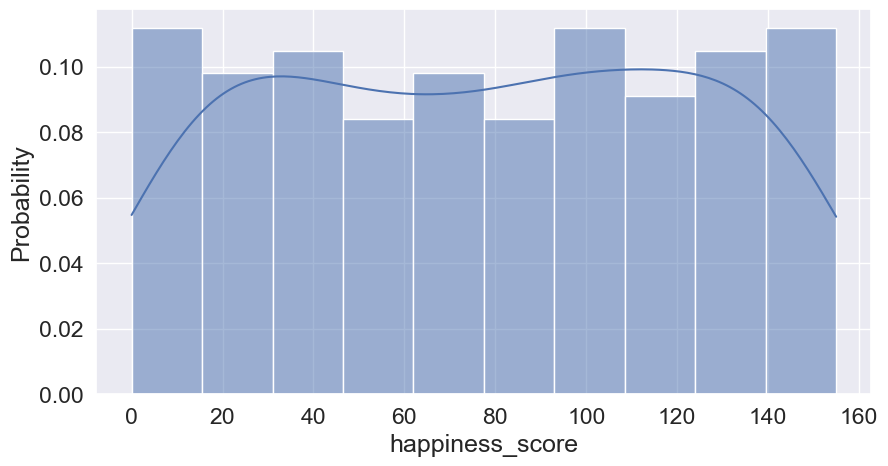

In [30]:
sns.histplot(x="happiness_score", data=happy,bins = 10, stat = 'probability', kde = True)

In [31]:
stat, p_value = stats.kstest(happy.happiness_score, stats.uniform(loc=0.0, scale=160.0).cdf)
print(f'With a p-value={round(p_value,4)}, we accept the null hypothesis that the data is Uniformly distributed. ')

With a p-value=0.9957, we accept the null hypothesis that the data is Uniformly distributed. 


6. Plot a correlation matrix (or a correlation heatmap) between all the numeric variables in the dataset. **Which variable is the least correlated with the `happiness_score` metric?** 

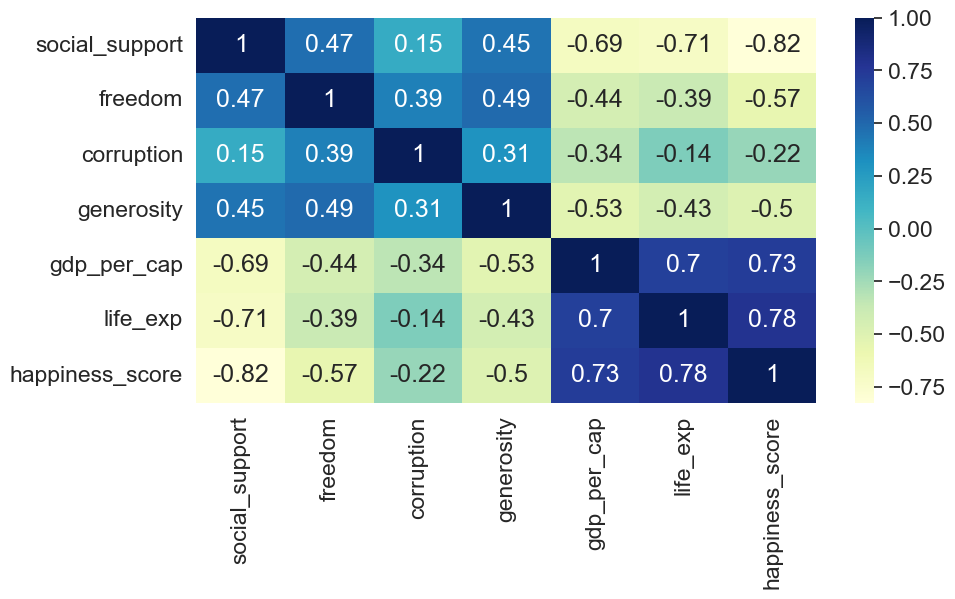

In [32]:
happy.corr()
# plotting correlation heatmap
dataplot = sns.heatmap(happy.corr(), cmap="YlGnBu", annot=True)

In [33]:
'''
variabile meno correlata ad *happines_score* è *corruption* con valore di -0.22, questo perchè il coefficiente di correlazione è espresso
in valori compresi tra -1 e 1 e più è un numero vicino agli estremi e maggiore è la correlazione,
-1 correlazione negativa e 1 correlazione positiva. 
Dunque più il numero è vicino allo 0 e più esprime assenza di correlazione tra le variabili.
'''

'\nvariabile meno correlata ad *happines_score* è *corruption* con valore di -0.22, questo perchè il coefficiente di correlazione è espresso\nin valori compresi tra -1 e 1 e più è un numero vicino agli estremi e maggiore è la correlazione,\n-1 correlazione negativa e 1 correlazione positiva. \nDunque più il numero è vicino allo 0 e più esprime assenza di correlazione tra le variabili.\n'

7. You may have noticed that the `corruption` metric has some missing values. **How many countries have a missing corruption value?** After you've answered the question, replace all missing values *in all columns of the DataFrame* with the *respective column's mean value*. 

In [34]:
happy.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          143 non-null    object 
 1   social_support   142 non-null    float64
 2   freedom          142 non-null    float64
 3   corruption       135 non-null    float64
 4   generosity       142 non-null    float64
 5   gdp_per_cap      143 non-null    int64  
 6   life_exp         143 non-null    float64
 7   happiness_score  143 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 9.1+ KB


In [35]:
# corruption have only 135 record non-null

In [36]:
happy[pd.isna(happy.corruption)]

,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
20,United Arab Emirates,72.0,4.0,NaN,15.0,65700,73.6,135
26,Saudi Arabia,62.0,68.0,NaN,82.0,48100,77.1,128
27,Qatar,NaN,NaN,NaN,NaN,113000,80.5,127
35,Bahrain,59.0,24.0,NaN,23.0,42000,79.8,119
47,Kuwait,69.0,47.0,NaN,42.0,64100,83.3,105
78,Turkmenistan,8.0,83.0,NaN,33.0,17600,70.3,69
84,China,108.0,31.0,NaN,133.0,17100,77.5,63
91,Jordan,88.0,88.0,NaN,118.0,8350,79.6,55


In [37]:
# eight countries have a missing corruption value

In [38]:
happy.fillna(happy.mean(), inplace=True)
happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          143 non-null    object 
 1   social_support   143 non-null    float64
 2   freedom          143 non-null    float64
 3   corruption       143 non-null    float64
 4   generosity       143 non-null    float64
 5   gdp_per_cap      143 non-null    int64  
 6   life_exp         143 non-null    float64
 7   happiness_score  143 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 9.1+ KB


C:\Users\leona\AppData\Local\Temp\ipykernel_13116\3230967305.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  happy.fillna(happy.mean(), inplace=True)


8. Use the `statsmodel` package to create a linear regression model where you use `life_exp` to predict the `happiness_score`. After [refreshing your memory on how to interpret a regression coefficient](https://statisticsbyjim.com/regression/interpret-coefficients-p-values-regression/#:~:text=The%20coefficient%20value%20signifies%20how,in%20isolation%20from%20the%20others.), answer the following question: given the model you just created, **a 1-year increase in life expectancy corresponds to an increase of how many points of the happiness score variable?**. 

In [39]:
import statsmodels.api as sm

In [40]:
Y = happy['happiness_score']
X = happy['life_exp']
X = sm.add_constant(data=X)   # aggiungere una costante al modello con 'sm.add_constant'
model = sm.OLS(endog=Y,exog=X) # creo un modello con sm.OLS, e do due parametri, ovvero x e y
results = model.fit() # addestro il modello con .fit e lo assegniamo a result.

In [41]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        happiness_score   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     219.4
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           1.59e-30
Time:                        11:25:18   Log-Likelihood:                -683.97
No. Observations:                 143   AIC:                             1372.
Df Residuals:                     141   BIC:                             1378.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -298.8710     25.536    -11.704      0.000    -349.355    -248.387
life_exp       5.1021      0.344     14.812      0.000       4.421       5.783
==============================================================================
Omnibus:                        7.539   Durbin-Watson:                   1.234
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                6.120
Skew:                          -0.408   Prob(JB):                       0.0469
Kurtosis:                       2.400   Cond. No.                         778.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
results.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,-298.8710,25.536,-11.704,0.000,-349.355,-248.387
life_exp,5.1021,0.344,14.812,0.000,4.421,5.783


In [43]:
# un aumento di 1 nella life expectancy da un aumento dell'happiness score di 5.1021

9. Split the dataset in `train` and `test` sets, leaving 33% of the data in the latter. Then, using the `sklearn` package, train a linear regression model where you try to predict the `happiness_score` using the following set of predictors: `['social_support', 'freedom', 'generosity', 'life_exp']` *(use a `random_state=42`)*. Calculate the R-squared on the train set and compare it with the R-squared based on the test set. **Would you say that the model is overfitting the training data?** Motivate your answer. 

In [44]:
happy.corr()

,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
social_support,1.000000,0.470893,0.153112,0.449225,-0.635651,-0.703274,-0.821384
freedom,0.470893,1.000000,0.379438,0.493207,-0.411042,-0.387622,-0.565298
corruption,0.153112,0.379438,1.000000,0.296768,-0.292755,-0.133278,-0.211122
generosity,0.449225,0.493207,0.296768,1.000000,-0.491708,-0.431770,-0.497250
gdp_per_cap,-0.635651,-0.411042,-0.292755,-0.491708,1.000000,0.701955,0.727973
life_exp,-0.703274,-0.387622,-0.133278,-0.431770,0.701955,1.000000,0.780225
happiness_score,-0.821384,-0.565298,-0.211122,-0.497250,0.727973,0.780225,1.000000


In [45]:
happy.corr()['happiness_score'].sort_values(ascending=False)

happiness_score    1.000000
life_exp           0.780225
gdp_per_cap        0.727973
corruption        -0.211122
generosity        -0.497250
freedom           -0.565298
social_support    -0.821384
Name: happiness_score, dtype: float64

In [46]:
y = happy['happiness_score']
X = happy[['social_support', 'freedom', 'generosity', 'life_exp']]
X = sm.add_constant(X)

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [48]:
model = sm.OLS(y_train,X_train)
results = model.fit()

In [49]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        happiness_score   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     85.19
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           1.44e-30
Time:                        11:25:26   Log-Likelihood:                -448.74
No. Observations:                 100   AIC:                             907.5
Df Residuals:                      95   BIC:                             920.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -3.6481     37.902     -0.096      0.924     -78.893      71.597
social_support    -0.5180      0.072     -7.229      0.000      -0.660      -0.376
freedom           -0.1645      0.058     -2.838      0.006      -0.279      -0.049
generosity        -0.0507      0.058     -0.869      0.387      -0.166       0.065
life_exp           1.8707      0.448      4.173      0.000       0.981       2.761
==============================================================================
Omnibus:                        0.853   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.653   Jarque-Bera (JB):                0.392
Skew:                          -0.012   Prob(JB):                        0.822
Kurtosis:                       3.306   Cond. No.                     2.83e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
'''
R-squared:0.782
Adj. R-squared:0.773

'''

'\nR-squared:0.782\nAdj. R-squared:0.773\n\n'

In [51]:
from sklearn.linear_model import LinearRegression   # calcolo R2 ma con la libreria Sklearn
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

In [52]:
r2_train

0.781988385444999

In [53]:
r2_test

0.7876546698691058

In [1]:
'''
    Se l'R quadro e l'R quadro corretto sono molto simili, 
    significa che il modello sta spiegando bene i dati di addestramento ma non è in grado di generalizzare bene su nuovi dati. 
    Quindi, il modello ha imparato troppo bene i dettagli dei dati di addestramento,
    e si sta comportando male su dati che non ha mai visto prima. 
    Questo è un forte indizio che il modello ha subito l'overfitting.
'''

"\n    Se l'R quadro e l'R quadro corretto sono molto simili, \n    significa che il modello sta spiegando bene i dati di addestramento ma non è in grado di generalizzare bene su nuovi dati. \n    Quindi, il modello ha imparato troppo bene i dettagli dei dati di addestramento,\n    e si sta comportando male su dati che non ha mai visto prima. \n    Questo è un forte indizio che il modello ha subito l'overfitting.\n"

10. Using the same model from the previous question, **calculate the MAE on the testing set and report it on the answers Sheet.** Are you satisfyied with the model's performance?

In [54]:
def mae(y, pred): # una funzione che prende le y e i valori previsti
    return round(np.mean(np.abs(y - pred)), 2) 

In [55]:
# Faccio il modello per Train

In [56]:
pred_train = results.predict(X_train)  

print('Naïve Training MAE:', mae(y_train, np.mean(y_train))) #naive mae, che sarebbe il benchmark
print('Training MAE:', mae(y_train, pred_train)) # mae(errore medio assoluto)

Naïve Training MAE: 40.06
Training MAE: 16.88


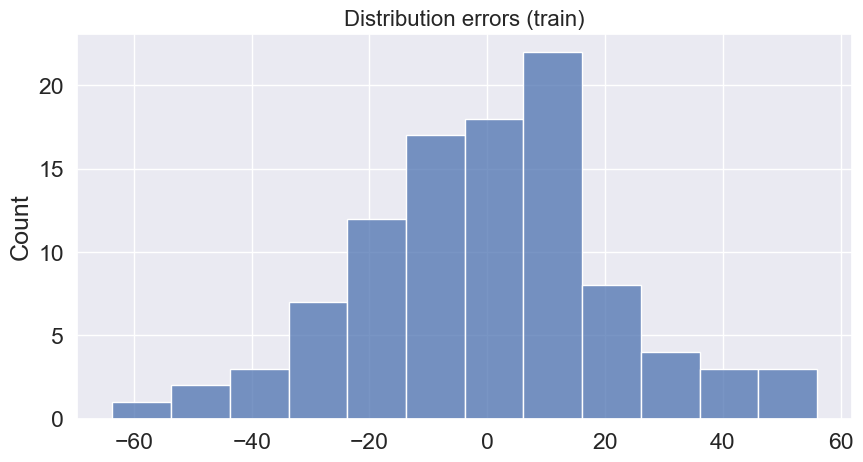

In [57]:
sns.histplot(y_train - pred_train).set_title("Distribution errors (train)", size=16)
plt.show()

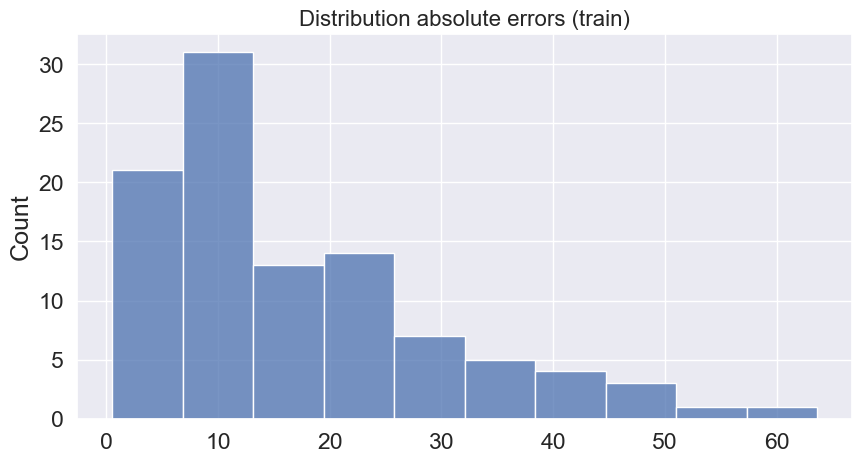

In [58]:
sns.histplot(np.abs(y_train - pred_train)).set_title("Distribution absolute errors (train)", size=16)
plt.show()

In [59]:
# Faccio il modello per Test

In [60]:
pred_test = results.predict(X_test)

print('Naïve Testing MAE:', mae(y_test, np.mean(y_test))) #naive mae , che sarebbe il benchmark
print('Testing MAE:', mae(y_test, pred_test)) # mae

Naïve Testing MAE: 40.91
Testing MAE: 17.49


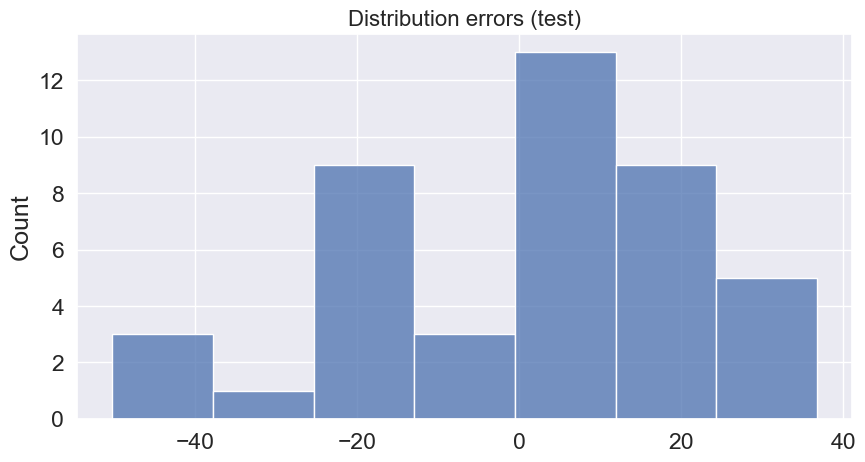

In [61]:
sns.histplot(y_test - pred_test).set_title("Distribution errors (test)", size=16)
plt.show()

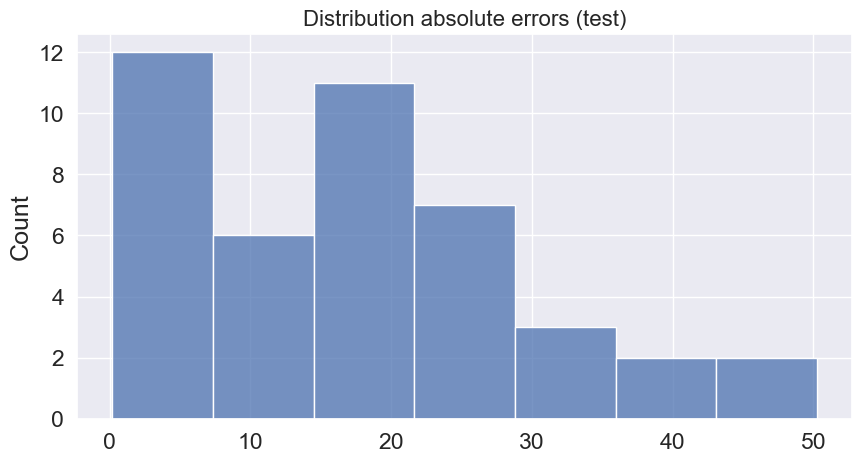

In [62]:
sns.histplot(np.abs(y_test - pred_test)).set_title("Distribution absolute errors (test)", size=16)
plt.show()

In [63]:
'''Confrontando i risultati di addestramento e test MAE, 
   possiamo concludere che il modello non si adatta eccessivamente ai dati, 
   infatti gli errori medi assoluti tra i due modelli sono abbastanza simili.
'''

'Confrontando i risultati di addestramento e test MAE, \n   possiamo concludere che il modello non si adatta eccessivamente ai dati, \n   infatti gli errori medi assoluti tra i due modelli sono abbastanza simili.\n   Nel caso di overfitting, ci sarebbe stata un differenza tra train e test, \n   con errori maggiori sulle previsioni dei test.\n'

### Bonus

11. <span style="color:red">[BONUS]</span> **Do you notice anything strange when looking at the regression coefficients of the model in the previous answer?** (answer here, not on the response Google Sheet)

In [63]:
coeff = pd.concat([pd.Series(X_test.columns), pd.Series(model.coef_)], axis=1)
coeff.columns = ['predictor', 'coefficient']
coeff

,predictor,coefficient
0,const,0.000000
1,social_support,-0.518018
2,freedom,-0.164463
3,generosity,-0.050693
4,life_exp,1.870662


12. <span style="color:red">[BONUS]</span> The code in the following cell creates a forecasting model using the `prophet` library. Specifically, it fits an additive model (the effect of the seasonality is added to the trend in order to get forecasts) on a dataframe `df` which contains the number of airline passengers over time. Notice how the seasonality in the forecast is too large at the start of the time series and too small at the end (compared to the data it tries to fit). **Modify the Prophet code to account for the effect of growing seasonality.** 

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\leona\anaconda3\envs\boolean\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\leona\anaconda3\envs\boolean\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\leona\anaconda3\envs\boolean\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


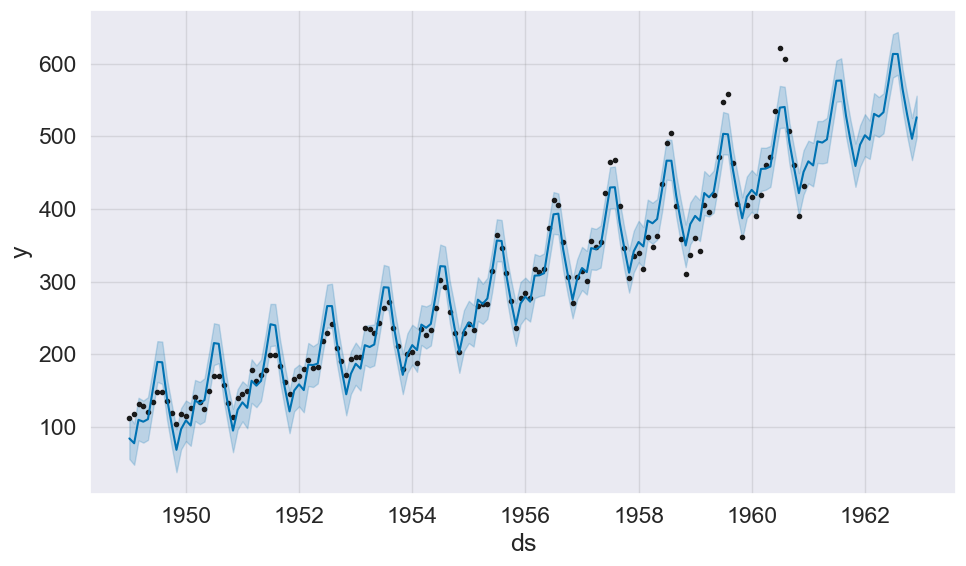

In [65]:
# DO NOT DELETE >>> RUN THIS CELL!

from prophet import Prophet

df = pd.read_excel('data/air-passengers.xlsx')
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(24, freq='MS')
forecast = m.predict(future)
fig = m.plot(forecast)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\leona\anaconda3\envs\boolean\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\leona\anaconda3\envs\boolean\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\leona\anaconda3\envs\boolean\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


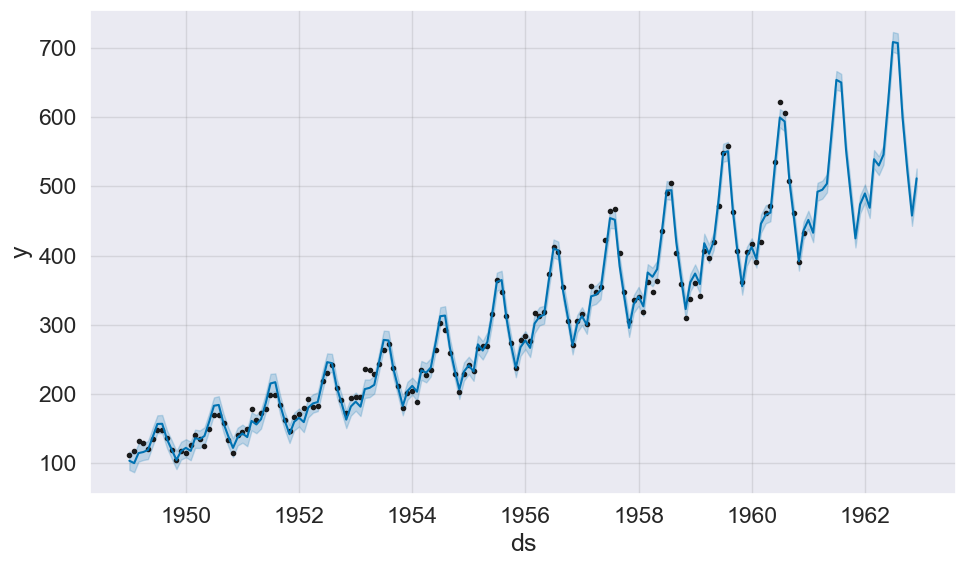

In [66]:
m = Prophet(seasonality_mode='multiplicative')
m.fit(df)
future = m.make_future_dataframe(24, freq='MS')
forecast = m.predict(future)
fig = m.plot(forecast)